# ASSISTments2012-2013 Data Analysis


## Data Description

### Column Description


| Field    | Annotation                                          |
| -------- | --------------------------------------------------- |
| problem_log_id|Unique ID of the logged actions. |
| skill|Skill name associated with the problem (different skills are in different rows). |
|problem_id|The ID of the problem |
|user_id|The ID of the student doing the problem |
|assignment_id|Two different assignments can have the same sequence id |
|assistment_id|The ID of the ASSISTment |
|start_time|Timestamp when the problem starts |
|end_time|Timestamp when the problem ends |
|problem_type|choose_1，algebra，fill_in or open_response |
|original|	Main problem or Scaffolding problem|
|correct|Correct on the fisrt attempt or Incorrect on the first attempt, or asked for help |
|bottom_hint|Whether or not the student asks for all hints |
|hint_count|Number of hints on this problem |
|actions|Every action on this problem |
|attempt_count|Number of student attempts on this problem |
|ms_first_response|The time in milliseconds for the student's first response |
|tutor_mode|tutor, test mode, pre-test, or post-test |
|sequence_id|The content id of the problem set |
|student_class_id|The class ID |
|position|Assignment position on the class assignments page |
|type|This is the type of the head section of the problem set |
|base_sequence_id|This is to account for if a sequence has been copied |
|skill_id|ID of the skill associated with the problem (different skills are in different rows) |
|teacher_id|The ID of the teacher who assigned the problem |
|school_id|The ID of the school where the problem was assigned |
|overlap_time|The time in milliseconds for the student's overlap time |
|template_id|The template ID of the ASSISTments |
|answer_id|The answer ID for multi-choice questions |
|answer_text|The answer text for fill-in questions |
|first_action|The type of first action: attempt or ask for a hint |
|problemlog_id|Unique ID of the logged actions |
|Average_confidence(FRUSTRATED)|Predicted Frustration of student for the problem |
|Average_confidence(CONFUSED)|Predicted Confusion of student for the problem |
|Average_confidence(CONCENTRATING)|Predicted Engaged Concentration of student for the problem |
|Average_confidence(BORED)|Predicted Boredom of student for the problem |

In [26]:
import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [28]:
path = "2012-2013-data-with-predictions-4-final.csv"

data = pd.read_csv(path, encoding = "ISO-8859-15",low_memory=False)

## Record Examples


In [29]:
pd.set_option('display.max_columns', 500)
data.head()

,problem_log_id,skill,problem_id,user_id,assignment_id,assistment_id,start_time,end_time,problem_type,original,correct,bottom_hint,hint_count,actions,attempt_count,ms_first_response,tutor_mode,sequence_id,student_class_id,position,type,base_sequence_id,skill_id,teacher_id,school_id,overlap_time,template_id,answer_id,answer_text,first_action,problemlogid,Average_confidence(FRUSTRATED),Average_confidence(CONFUSED),Average_confidence(CONCENTRATING),Average_confidence(BORED)
0,137792159,NaN,557460,61394,565736,341511,2012-09-28 15:11:27,2012-09-28 15:11:36.856,choose_1,1,1.0,0.0,0,"--- \n- - start\n - 1348859487561\n - ""95952...",1,9852,tutor,55482,23643,4,LinearSection,55482,NaN,53472,5048.0,9852,341511,NaN,she,0,137792159,0.361323,0.0,0.336529,0.000000
1,138083797,Rounding,365981,61394,573819,204043,2012-10-09 11:01:52,2012-10-09 11:02:13.182,algebra,1,1.0,0.0,0,"--- \n- - start\n - 1349794912269\n - ""62459...",1,21175,tutor,34221,22967,5,LinearSection,34221,54.0,47424,5048.0,21175,204043,NaN,74.29,0,138083797,0.361323,0.0,0.766925,0.000000
2,142332619,Multiplication and Division Integers,426415,61394,734130,247525,2013-03-07 10:53:20,2013-03-07 10:53:28.661,algebra,1,0.0,0.0,0,"--- \n- - start\n - 1362671600405\n - ""74107...",1,8645,tutor,39601,22967,58,LinearSection,39601,279.0,47424,5048.0,8645,247525,NaN,00,0,142332619,0.361323,0.0,0.766925,0.442968
3,145939397,Proportion,86686,61394,821352,48081,2013-08-20 19:54:56,2013-08-20 19:55:21.753,algebra,1,1.0,0.0,0,"--- \n- - start\n - 1377042896503\n - ""73630...",1,25728,tutor,6912,26303,21,MasterySection,6912,79.0,47424,5048.0,25728,46362,NaN,3.8,0,145939397,0.775000,0.0,0.766925,0.912281
4,137111284,NaN,399669,76592,557216,227869,2012-09-10 17:20:10,2012-09-10 17:24:56.579,choose_1,1,1.0,0.0,0,"--- \n- - start\n - 1347312010563\n - ""69479...",1,286578,tutor,37143,21696,3,LinearSection,37143,NaN,152676,7561.0,286578,227869,NaN,C (wr - 1)(wr + 1),0,137111284,0.361323,0.0,0.766925,0.000000


----
## General features

In [30]:
data.describe()

,problem_log_id,problem_id,user_id,assignment_id,assistment_id,original,correct,bottom_hint,hint_count,attempt_count,ms_first_response,sequence_id,student_class_id,position,base_sequence_id,skill_id,teacher_id,school_id,overlap_time,template_id,answer_id,first_action,problemlogid,Average_confidence(FRUSTRATED),Average_confidence(CONFUSED),Average_confidence(CONCENTRATING),Average_confidence(BORED)
count,6.123270e+06,6.123270e+06,6.123270e+06,6.123270e+06,6.123270e+06,6.123270e+06,6.123270e+06,6.062922e+06,6.123270e+06,6.123270e+06,6.123270e+06,6.123270e+06,6.123270e+06,6.123270e+06,6.123270e+06,2.711813e+06,6.123270e+06,6.123113e+06,6.123270e+06,6.123270e+06,8.275000e+03,6.123270e+06,6.123270e+06,6.123270e+06,6.123270e+06,6.123270e+06,6.123270e+06
mean,1.414932e+08,3.685675e+05,1.770492e+05,6.773074e+05,2.202825e+05,9.504296e-01,6.768206e-01,1.200497e-01,3.373479e-01,1.339212e+00,4.873469e+04,6.689567e+04,2.342511e+04,7.402669e+01,6.214174e+04,1.932575e+02,1.210437e+05,6.925225e+03,4.907237e+04,2.088952e+05,4.324879e+05,6.151860e-02,1.414932e+08,3.894586e-01,4.479487e-02,6.823843e-01,2.567723e-01
std,2.693733e+06,2.195421e+05,3.172431e+04,9.425983e+04,1.393519e+05,2.170557e-01,4.674909e-01,3.250197e-01,9.851956e-01,1.056276e+00,2.673557e+05,5.933111e+04,1.612341e+03,3.697118e+02,5.687449e+04,1.303155e+02,4.978645e+04,3.314489e+03,2.884992e+05,1.458227e+05,3.534885e+05,2.635170e-01,2.693733e+06,1.027662e-01,1.924793e-01,1.713734e-01,2.862460e-01
min,1.368431e+08,1.000000e+00,2.142100e+04,1.814560e+05,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.767000e+03,2.000000e+00,1.139300e+04,0.000000e+00,2.000000e+00,1.000000e+00,1.143600e+04,1.000000e+00,-6.767000e+03,5.000000e+00,1.000000e+00,0.000000e+00,1.368431e+08,3.613230e-01,0.000000e+00,1.707320e-01,0.000000e+00
25%,1.391705e+08,1.284030e+05,1.719780e+05,5.863570e+05,6.883725e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,9.436000e+03,1.266200e+04,2.251800e+04,4.000000e+00,1.189800e+04,6.500000e+01,7.305500e+04,5.260000e+03,9.468000e+03,5.259000e+04,1.060495e+05,0.000000e+00,1.391705e+08,3.613230e-01,0.000000e+00,7.669250e-01,0.000000e+00
50%,1.414916e+08,4.168130e+05,1.791670e+05,6.785645e+05,2.399180e+05,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.233100e+04,4.614100e+04,2.314400e+04,1.200000e+01,4.493100e+04,2.770000e+02,1.285010e+05,5.978000e+03,2.241500e+04,2.395460e+05,3.442820e+05,0.000000e+00,1.414916e+08,3.613230e-01,0.000000e+00,7.669250e-01,2.214840e-01
75%,1.438272e+08,5.644030e+05,1.972510e+05,7.672320e+05,3.466830e+05,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.486500e+04,9.901300e+04,2.460300e+04,3.800000e+01,8.711200e+04,3.100000e+02,1.562940e+05,9.394000e+03,5.505400e+04,3.434800e+05,7.385615e+05,0.000000e+00,1.438272e+08,3.613230e-01,0.000000e+00,7.669250e-01,4.429680e-01
max,1.462357e+08,7.671430e+05,2.282130e+05,8.330540e+05,4.925890e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,2.900000e+01,3.450552e+08,2.084530e+05,2.738600e+04,8.533000e+03,2.084530e+05,1.641000e+03,2.205230e+05,1.242800e+04,3.452775e+08,4.925890e+05,1.184706e+06,2.000000e+00,1.462357e+08,8.671330e-01,1.000000e+00,7.669250e-01,1.000000e+00


In [31]:
print("The number of records: "+ str(len(data['problem_log_id'].unique())))

The number of records: 6123270


In [32]:
print('Part of missing values for every column')
print(data.isnull().sum() / len(data))

Part of missing values for every column
problem_log_id                       0.000000
skill                                0.570478
problem_id                           0.000000
user_id                              0.000000
assignment_id                        0.000000
assistment_id                        0.000000
start_time                           0.000000
end_time                             0.000000
problem_type                         0.000000
original                             0.000000
correct                              0.000000
bottom_hint                          0.009856
hint_count                           0.000000
actions                              0.000000
attempt_count                        0.000000
ms_first_response                    0.000000
tutor_mode                           0.000000
sequence_id                          0.000000
student_class_id                     0.000000
position                             0.000000
type                                 0.0

In [33]:
len(data.user_id.unique())

46674

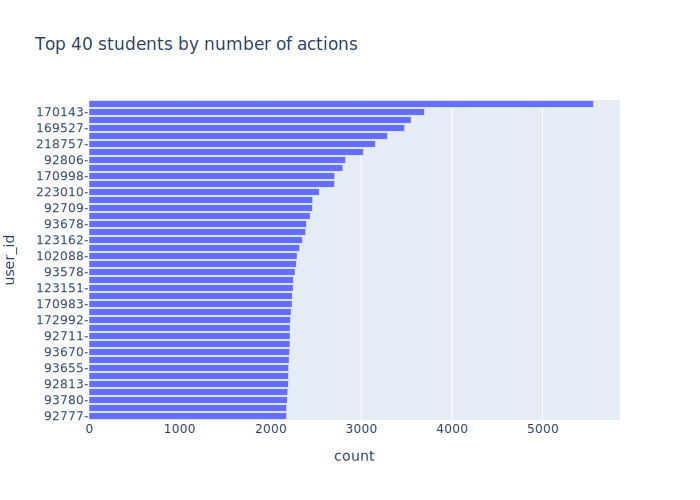

In [34]:
ds = data['user_id'].value_counts().reset_index()

ds.columns = [
    'user_id',
    'count'
]

ds['user_id'] = ds['user_id'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'user_id',
    orientation='h',
    title='Top 40 students by number of actions'
)

fig.show('svg')

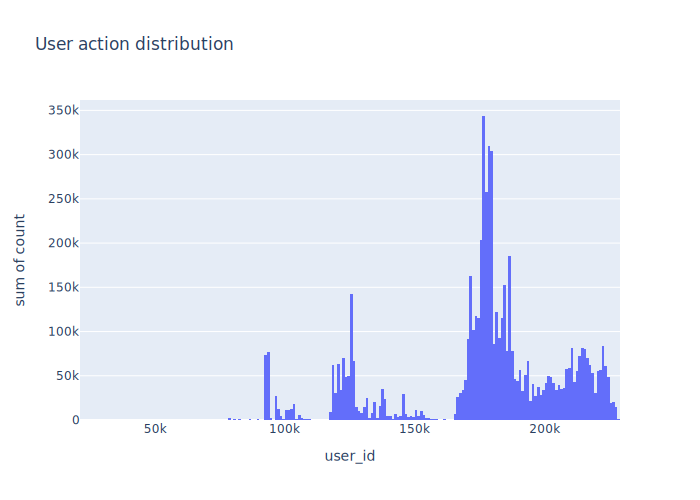

In [35]:
ds = data['user_id'].value_counts().reset_index()

ds.columns = [
    'user_id',
    'count'
]

ds = ds.sort_values('user_id')

fig = px.histogram(
    ds,
    x = 'user_id',
    y = 'count',
    title = 'User action distribution'
)

fig.show('svg')

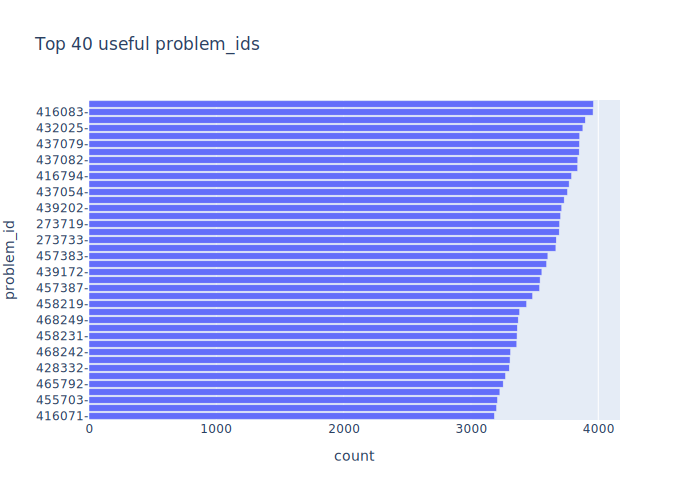

In [36]:
ds = data['problem_id'].value_counts().reset_index()

ds.columns = [
    'problem_id',
    'count'
]

ds['problem_id'] = ds['problem_id'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'problem_id',
    orientation = 'h',
    title = 'Top 40 useful problem_ids'
)

fig.show('svg')

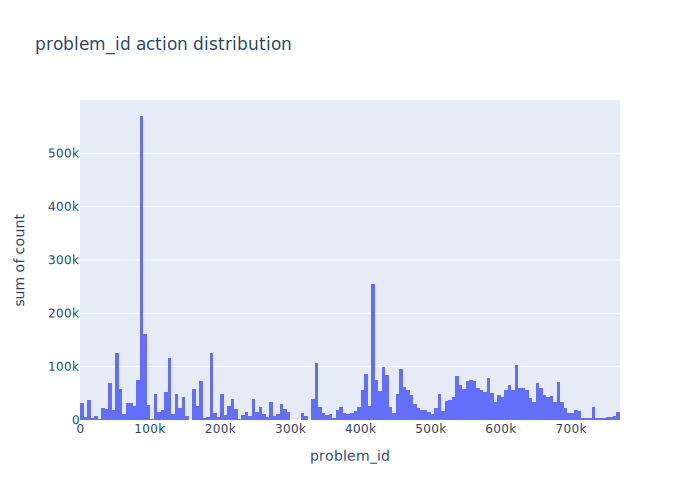

In [37]:
ds = data['problem_id'].value_counts().reset_index()

ds.columns = [
    'problem_id', 
    'count'
]

ds = ds.sort_values('problem_id')

fig = px.histogram(
    ds, 
    x='problem_id', 
    y='count', 
    title='problem_id action distribution'
)

fig.show('svg')

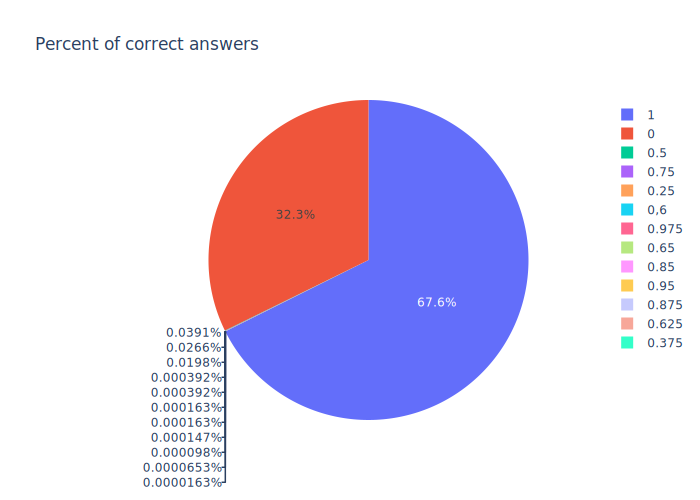

'Minor note:we also have Essay questions that teachers can grade. If this value is say 0.25, that means the teacher gave it a 1 out of 4.'

In [38]:
ds = data['correct'].value_counts().reset_index()

ds.columns = [
    'correct',
    'percent'
]

ds['percent'] /= len(data)
ds = ds.sort_values(['correct'])

fig = px.pie(
    ds,
    names = ['0', '0.25','0.375','0.5','0,6','0.625','0.65','0.75','0.85','0.875','0.95','0.975','1'],
    values = 'percent',
    title = 'Percent of correct answers'
)

fig.show('svg')
"Minor note:we also have Essay questions that teachers can grade. If this value is say 0.25, that means the teacher gave it a 1 out of 4."

****
## Sort by sequence id

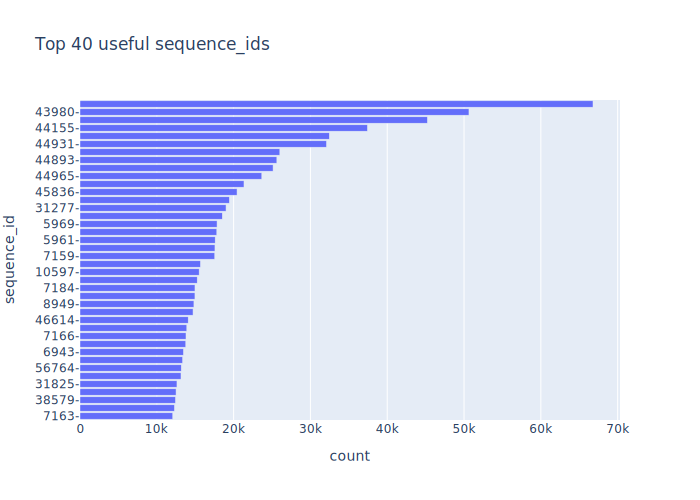

In [39]:
ds = data['sequence_id'].value_counts().reset_index()

ds.columns = [
    'sequence_id',
    'count'
]

ds['sequence_id'] = ds['sequence_id'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'sequence_id',
    orientation = 'h',
    title = 'Top 40 useful sequence_ids'
)

fig.show('svg')

## sort by problem types

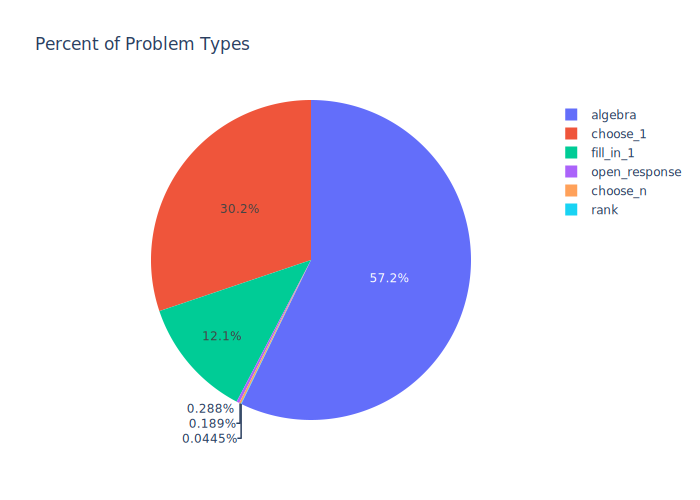

In [40]:
ds = data['problem_type'].value_counts().reset_index()

ds.columns = [
    'problem_type',
    'percent'
]

ds['percent'] /= len(data)
ds = ds.sort_values(['percent'])

fig = px.pie(
    ds,
    names = 'problem_type',
    values = 'percent',
    title = 'Percent of Problem Types',
)

fig.show('svg')

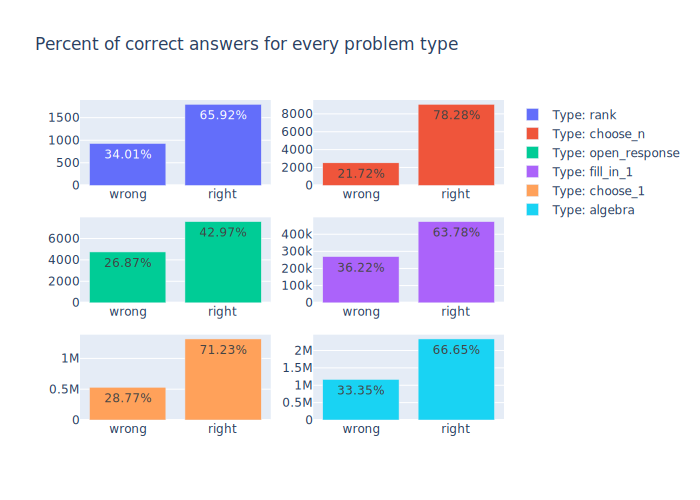

In [41]:
ds = ds.sort_values(['percent']).tail(6)

fig = make_subplots(rows=3, cols=2)

traces = [
    go.Bar(
        x = ['wrong', 'right'],
        y = [
            len(data[(data['problem_type'] == item) & (data['correct'] == 0)]),
            len(data[(data['problem_type'] == item) & (data['correct'] == 1)])
        ],
        name = 'Type: ' + str(item),
        text = [
            str(round(100*len(data[(data['problem_type'] == item)&(data['correct'] == 0)])/len(data[data['problem_type'] == item]),2)) + '%',
            str(round(100*len(data[(data['problem_type'] == item)&(data['correct'] == 1)])/len(data[data['problem_type'] == item]),2)) + '%'
        ],
        textposition = 'auto'
    ) for item in ds['problem_type'].unique().tolist()
]

for i in range(len(traces)):
    fig.append_trace(
        traces[i],
        (i //2) + 1,
        (i % 2) + 1
    )

fig.update_layout(
    title_text = 'Percent of correct answers for every problem type',
)

fig.show('svg')


****
## Sort by schools


In [42]:
len(data['school_id'].unique())

662

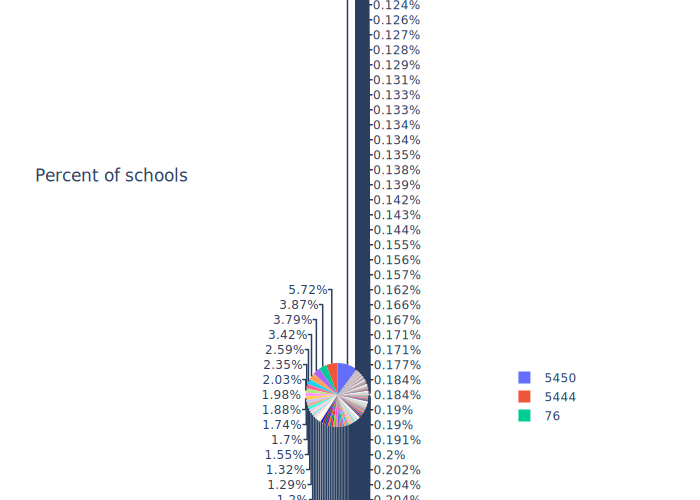

In [43]:
ds = data['school_id'].value_counts().reset_index()

ds.columns = [
    'school_id',
    'percent'
]

ds['percent'] /= len(data)
ds = ds.sort_values(['percent'])

fig = px.pie(
    ds,
    names = 'school_id',
    values = 'percent',
    title = 'Percent of schools',
)

fig.show('svg')

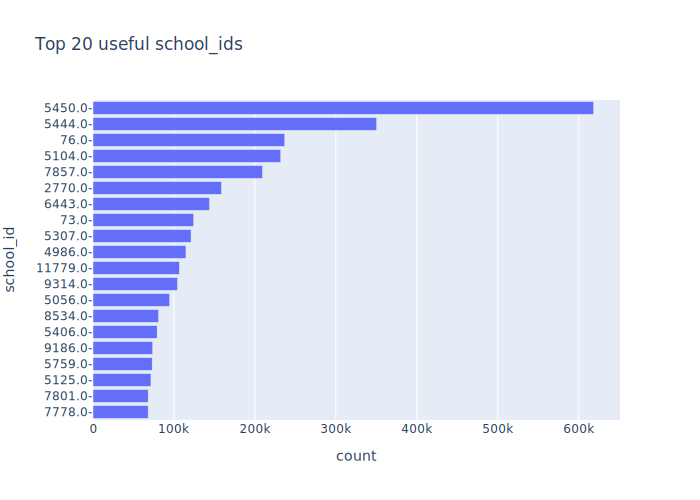

In [44]:
ds = data['school_id'].value_counts().reset_index()

ds.columns = [
    'school_id',
    'count'
]

ds['school_id'] = ds['school_id'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(20)

fig = px.bar(
    ds,
    x = 'count',
    y = 'school_id',
    orientation = 'h',
    title = 'Top 20 useful school_ids'
)

fig.show('svg')

****
## Sort by attemp counts

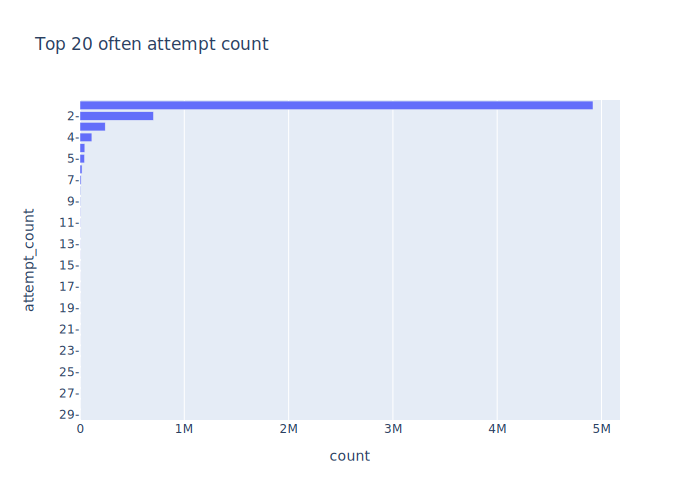

In [45]:
ds = data['attempt_count'].value_counts().reset_index()

ds.columns = [
    'attempt_count',
    'count'
]

ds['attempt_count'] = ds['attempt_count'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'attempt_count',
    orientation = 'h',
    title = 'Top 20 often attempt count'
)

fig.show('svg')

*******
## Sort by skills

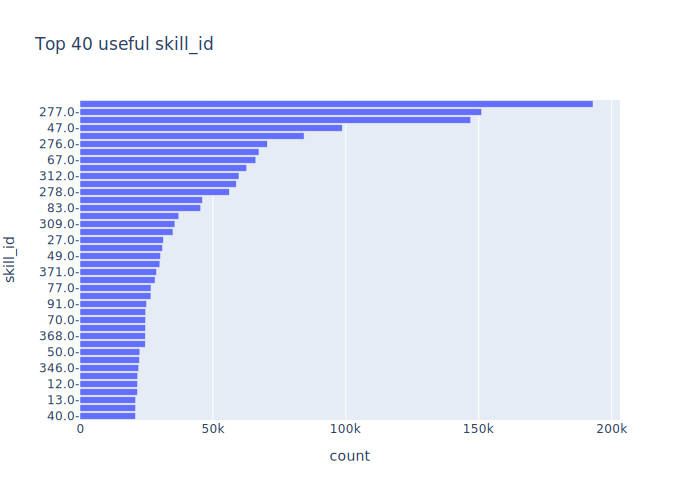

In [46]:
ds = data['skill_id'].dropna() # There are less NaNs in 'skill_id' column than 'skill_name' column.
ds = ds.value_counts().reset_index()

ds.columns = [
    'skill_id',
    'count'
]

ds['skill_id'] = ds['skill_id'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'skill_id',
    orientation = 'h',
    title = 'Top 40 useful skill_id'
)

fig.show('svg')